<a href="https://colab.research.google.com/github/JoaquinGonzalezSimon/Data_science_and_ML_from_Medium/blob/main/220531_Flipkart_Reviews_Sentiment_Analysis_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This project was taken from the following link and I use it to practice my skills

https://thecleverprogrammer.com/2022/02/15/flipkart-reviews-sentiment-analysis-using-python/

https://medium.com/coders-camp/180-data-science-and-machine-learning-projects-with-python-6191bc7b9db9

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/flipkart_reviews.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2304 entries, 0 to 2303
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product_name  2304 non-null   object
 1   Review        2304 non-null   object
 2   Rating        2304 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 54.1+ KB


In [4]:
data.head()

,Product_name,Review,Rating
0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5
1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence...,5
2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5
3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product 👌🏻😘,5
4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Light weight laptop with new amazing features,...",5


In [5]:
data.isnull().sum()

Product_name    0
Review          0
Rating          0
dtype: int64

In [6]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
stemmer = nltk.SnowballStemmer('english')
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
stopword=set(stopwords.words('english'))

In [ ]:
stopword

In [11]:
def clean(text):
  text = str(text).lower()
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('https?://\S+|www\.\S+', '', text)
  text = re.sub('<.*?>+', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), "", text)
  text = re.sub('\n', '', text)
  text = re.sub('\w*\d\w', '', text)
  text = [word for word in text.split(' ') if word not in stopword]
  text = ' '.join(text)
  text = [stemmer.stem(word) for word in text.split(' ')]
  text = ' '.join(text)
  return text

In [12]:
data['Review'] = data['Review'].apply(clean)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2304 entries, 0 to 2303
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product_name  2304 non-null   object
 1   Review        2304 non-null   object
 2   Rating        2304 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 54.1+ KB


In [15]:
data.head()

,Product_name,Review,Rating
0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,best great performancei got around atteri bac...,5
1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,good perfom,5
2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,great perform usual also game laptop issu batt...,5
3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,wife happi best product 👌🏻😘,5
4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,light weight laptop new amaz featur batteri li...,5


In [17]:
ratings = data['Rating'].value_counts()
ratings

5    1382
4     552
1     184
3     140
2      46
Name: Rating, dtype: int64

In [18]:
numbers = ratings.index
numbers

Int64Index([5, 4, 1, 3, 2], dtype='int64')

In [19]:
quantity = ratings.values
quantity

array([1382,  552,  184,  140,   46])

In [20]:
import plotly.express as px

In [21]:
figure = px.pie(data, values=quantity, names=numbers, hole=0.5)
figure.show()

In [22]:
text = ' '.join(i for i in data.Review)
text

"best  great performancei got around atteri backup bit low thank rapid charger fast display ok price rang decent speaker mani customis optionsvantag softwar good customisationoveral good perform till nowwil updat later problem occur good perfom great perform usual also game laptop issu batteri stand 2  3 hrs without adapt prefer use adaptor use softwar play game wife happi best product 👌🏻😘 light weight laptop new amaz featur batteri life awesom amaz laptop much happi thank flipkart good laptop person use thank much flipkart amaz product good normal work  student onlin class watch movi etcnot havi task game buis work offic workedit etcoveral good laptop rang budget laptop laptop receiv good packag good condit perform wise littl bit slow compar i3 processor intel general usag laptop perform good nice good product dilevari slow affort thousand extra prefer laptop configi came know done limit laptoppoor webcam even suitabl day day onlin classessound low need connect extern speakerskeypad v

In [23]:
len(text)

281999

In [24]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)

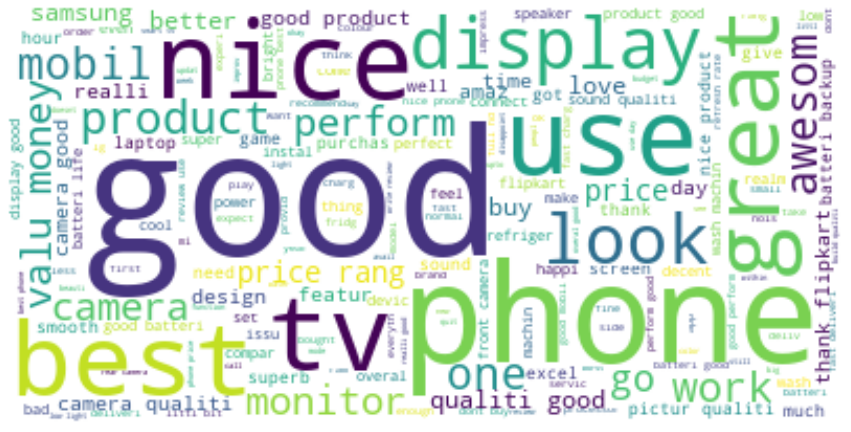

In [27]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [30]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data['Positive'] = [sentiments.polarity_scores(i)['pos'] for i in data['Review']]
data['Negative'] = [sentiments.polarity_scores(i)['neg'] for i in data['Review']]
data['Neutral'] = [sentiments.polarity_scores(i)['neu'] for i in data['Review']]
data['Compound'] = [sentiments.polarity_scores(i)['compound'] for i in data['Review']]


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [31]:
data2 = data[['Review', 'Positive', 'Negative', 'Neutral', 'Compound']]
data2.head()

,Review,Positive,Negative,Neutral,Compound
0,best great performancei got around atteri bac...,0.387,0.099,0.514,0.9325
1,good perfom,0.744,0.000,0.256,0.4404
2,great perform usual also game laptop issu batt...,0.277,0.000,0.723,0.7579
3,wife happi best product 👌🏻😘,0.512,0.000,0.488,0.6369
4,light weight laptop new amaz featur batteri li...,0.000,0.000,1.000,0.0000


In [32]:
x = sum(data2.Positive)
y = sum(data2.Negative)
z = sum(data2.Neutral)

In [36]:
def sentiment_score(a,b,c):
  if (a>b) and (a > c):
    print('Positive :)')
  elif (b>a) and (b>c):
    print('Negative >:(')
  else:
    print('Neutral :|')


In [37]:
sentiment_score(x,y,z)

Neutral :|


In [39]:
print("Positive: ", x)
print('Negative: ', y)
print('Neutral: ', z)

Positive:  919.5179999999992
Negative:  96.23200000000016
Neutral:  1288.258
